# Pymaceuticals Inc.
---

### Analysis

1. The sex of all the mice are around half, nearly 50%.
2. Capomulin and Ramicane have outliers.
3. The volume is decreasing throughout the 45 days.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/XueYiLu/Desktop/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/XueYiLu/Desktop/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_mouse_data = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merged_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [20]:
# Checking the number of mice.
total_mice = len(merged_mouse_data['Mouse ID'].unique())
total_mice

249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_results[study_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_results = merged_mouse_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_study_results = clean_study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [28]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = clean_study_results['Mouse ID'].nunique()
unique_mice_count

249

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = merged_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = merged_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = merged_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_deviation_tumor_volume = merged_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = merged_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean': mean_tumor_volume,
    'Median': median_tumor_volume,
    'Variance': variance_tumor_volume,
    'Std Deviation': std_deviation_tumor_volume,
    'SEM': sem_tumor_volume
})
summary_stats


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = merged_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

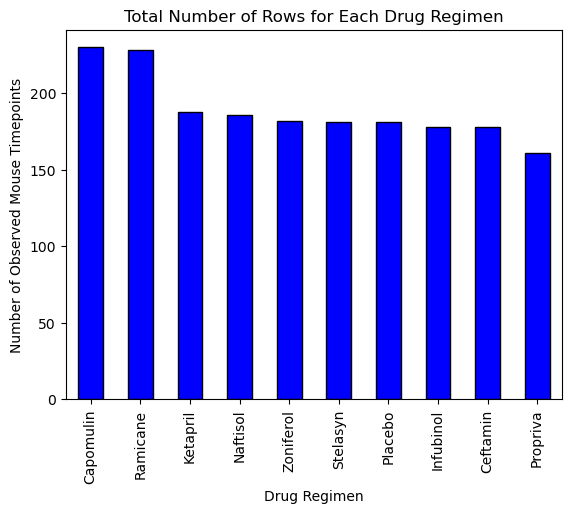

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_per_regimen = merged_mouse_data['Drug Regimen'].value_counts()

rows_per_regimen.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.show()

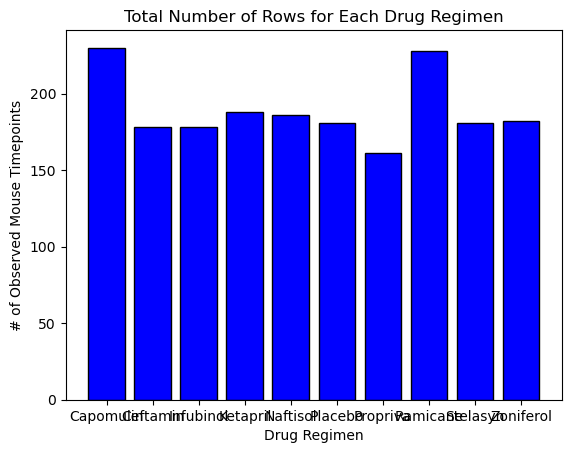

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
rows_per_regimen = merged_mouse_data.groupby('Drug Regimen').size().reset_index(name='Number of Rows')

plt.bar(rows_per_regimen['Drug Regimen'], rows_per_regimen['Number of Rows'], color='blue', edgecolor='black')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

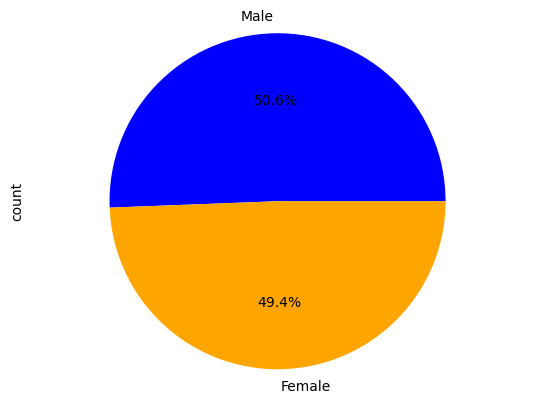

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = merged_mouse_data['Sex'].value_counts()

gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.axis('equal') 
plt.show()

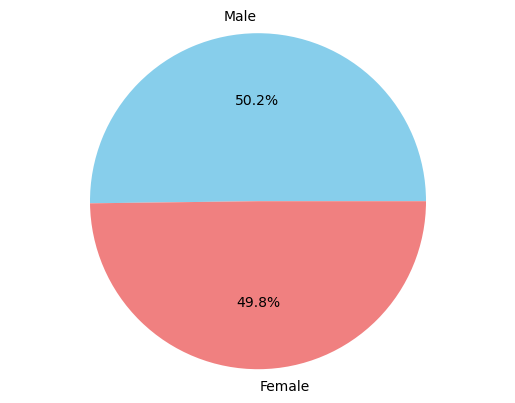

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = mouse_metadata['Sex'].value_counts()

plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.axis('equal') 
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoints = merged_mouse_data.groupby('Mouse ID')['Timepoint'].max()

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = merged_mouse_data[merged_mouse_data['Drug Regimen'].isin(selected_regimens)]

final_tumor_volume_df = pd.merge(final_tumor_volume_df, last_timepoints, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volume_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,u153,Ceftamin,Female,11,25,0,45.000000,0
1,b447,Ceftamin,Male,2,30,0,45.000000,0
2,x226,Ceftamin,Male,23,28,0,45.000000,0
3,t573,Ceftamin,Female,15,27,0,45.000000,0
4,c326,Infubinol,Female,18,25,5,36.321346,0
...,...,...,...,...,...,...,...,...
95,a644,Ramicane,Female,7,17,45,32.978522,1
96,i177,Ramicane,Male,10,18,45,33.562402,3
97,r944,Capomulin,Male,12,25,45,41.581521,2
98,u364,Capomulin,Male,18,17,45,31.023923,3


In [55]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

    
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

for selected_regimens in selected_regimens:
    tumor_vol_subset = merged_mouse_data.loc[merged_mouse_data['Drug Regimen'] == selected_regimens, 'Tumor Volume (mm3)']
    
    tumor_vol_data.append(tumor_vol_subset)
    
    quartiles = tumor_vol_subset.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    
    print(f"Potential outliers for {selected_regimens}:")
    print(tumor_vol_subset[(tumor_vol_subset < lower_bound) | (tumor_vol_subset > upper_bound)])
    print("\n")

tumor_vol_data

Potential outliers for Capomulin:
1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64


Potential outliers for Ramicane:
1814    22.050126
Name: Tumor Volume (mm3), dtype: float64


Potential outliers for Infubinol:
Series([], Name: Tumor Volume (mm3), dtype: float64)


Potential outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)




[0       45.000000
 226     45.000000
 227     45.000000
 228     45.000000
 229     45.000000
           ...    
 1854    40.728578
 1859    38.125164
 1878    47.685963
 1888    41.581521
 1889    31.023923
 Name: Tumor Volume (mm3), Length: 230, dtype: float64,
 58      45.000000
 59      45.000000
 60      45.000000
 61      45.000000
 62      45.000000
           ...    
 1867    40.667713
 1870    29.128472
 1874    37.225650
 1879    32.978522
 1885    33.562402
 Name: Tumor Volume (mm3), Length: 228, dtype: float64,
 29      45.000000
 30      45.000000
 31      45.000000
 32      45.000000
 33      45.000000
           ...    
 1789    66.196912
 1794    66.083066
 1802    62.435404
 1804    67.973419
 1806    60.918767
 Name: Tumor Volume (mm3), Length: 178, dtype: float64,
 170     45.000000
 171     45.000000
 172     45.000000
 173     45.000000
 174     45.000000
           ...    
 1858    68.923185
 1862    61.386660
 1864    64.299830
 1872    59.741901
 1890    61.433

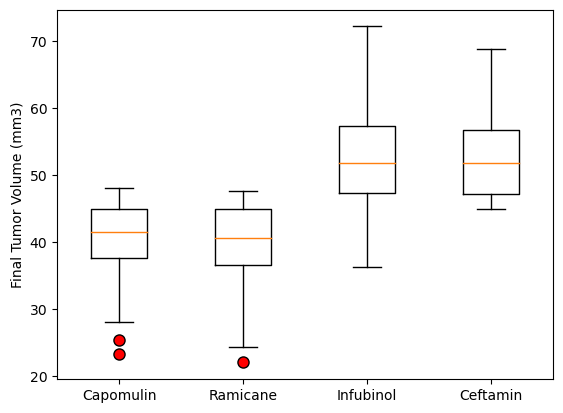

In [59]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

for treatment in treatments:
    tumor_vol_subset = merged_mouse_data.loc[merged_mouse_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    tumor_vol_data.append(tumor_vol_subset)

plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

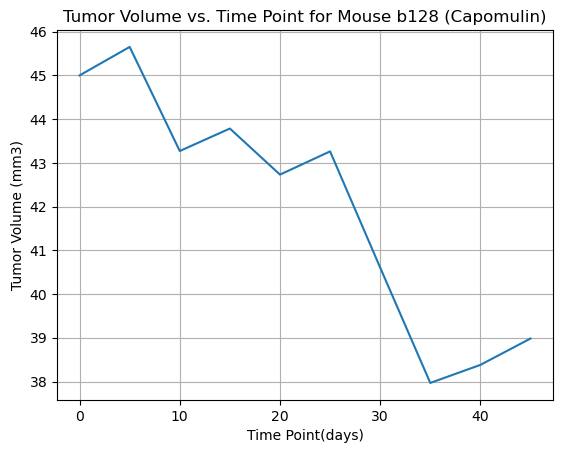

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id_capomulin = merged_mouse_data.loc[merged_mouse_data['Drug Regimen'] == 'Capomulin', 'Mouse ID'].iloc[0]
single_mouse_capomulin = merged_mouse_data.loc[(merged_mouse_data['Mouse ID'] == mouse_id_capomulin) & (merged_mouse_data['Drug Regimen'] == 'Capomulin')]

plt.plot(single_mouse_capomulin['Timepoint'], single_mouse_capomulin['Tumor Volume (mm3)'])
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id_capomulin} (Capomulin)')
plt.xlabel('Time Point(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

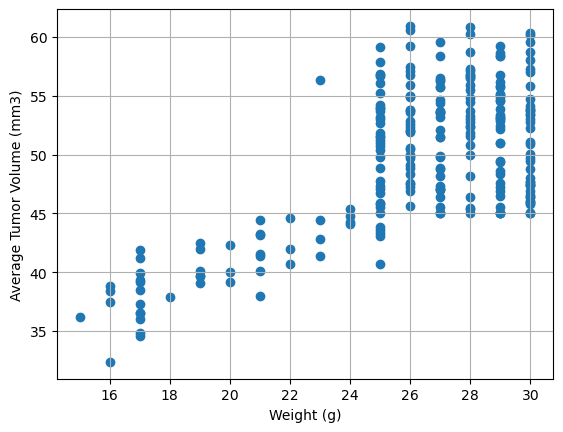

In [63]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = merged_mouse_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = merged_mouse_data.groupby('Mouse ID')['Weight (g)'].first()

plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

NameError: name 'slope' is not defined

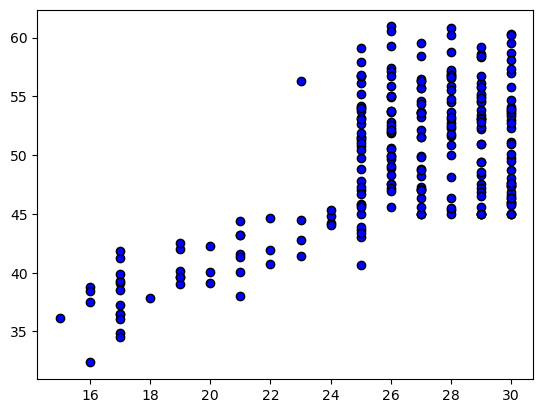

In [67]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = mouse_weight.corr(average_tumor_volume)
correlation_coefficient


plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='b', edgecolor='black')

regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='red')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()